# Medical Diagnosis with Naive Bayes

You work for a medical research institute, and your task is to develop a diagnostic system using the Naive Bayes algorithm. You have a dataset with various medical test results, patient information, and corresponding diagnoses (e.g., presence or absence of a medical condition). Your goal is to create a classification model to aid in the medical diagnosis process. Answer the following questions based on this case study.

# 1. Data Exploration:

a. Load and explore the medical dataset using Python libraries like pandas. Describe the features, labels, and the distribution of diagnoses.

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("medical_dataset.csv")
df.head()

Age  BloodPressure  Cholesterol       BMI  BloodSugar  HeartRate  \
0  0.234215       0.085030     0.440695 -0.237936   -0.998354   1.550500   
1  0.184836       0.644227    -0.820861 -0.520506    0.700310  -0.858358   
2  0.346504      -0.780111     0.796141  0.691282    0.477041  -0.046921   
3 -0.973069      -0.252001     0.650793  0.101979   -0.158530   1.196572   
4  0.328762      -1.150109     1.240078  0.998702    0.421921   0.321357   

   GeneticFactor  X-rayResult  UltrasoundResult  LabTestResult  Diagnosis  
0       0.984322     1.372246         -0.034685      -0.213989          1  
1      -0.575638     0.841178          0.493318       0.122010          1  
2       0.076822    -1.473117         -0.467701      -1.282992          0  
3      -0.027305     0.428323          0.119580      -0.933268          1  
4       1.613711    -2.019418         -0.064138       0.453534          0

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               200 non-null    float64
 1   BloodPressure     200 non-null    float64
 2   Cholesterol       200 non-null    float64
 3   BMI               200 non-null    float64
 4   BloodSugar        200 non-null    float64
 5   HeartRate         200 non-null    float64
 6   GeneticFactor     200 non-null    float64
 7   X-rayResult       200 non-null    float64
 8   UltrasoundResult  200 non-null    float64
 9   LabTestResult     200 non-null    float64
 10  Diagnosis         200 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 17.3 KB


In [79]:
df.describe()

Age  BloodPressure  Cholesterol         BMI  BloodSugar  \
count  200.000000     200.000000   200.000000  200.000000  200.000000   
mean    -0.002128      -0.042915     0.075489    0.028260    0.061614   
std      1.047125       0.777588     1.367159    0.571124    1.043689   
min     -2.921350      -2.743229    -3.085661   -1.157399   -2.896255   
25%     -0.767171      -0.593736    -0.972878   -0.410679   -0.687282   
50%     -0.056583      -0.109464     0.284271    0.046618    0.127399   
75%      0.687815       0.548233     0.969559    0.444390    0.753329   
max      2.601683       1.643544     3.971278    2.069709    2.579709   

        HeartRate  GeneticFactor  X-rayResult  UltrasoundResult  \
count  200.000000     200.000000   200.000000        200.000000   
mean     0.023716      -0.002595    -0.008239          0.154227   
std      0.982192       1.008122     1.303288          0.875834   
min     -2.650970      -2.696887    -3.365582         -2.081929   
25%     -0.576483      -0.649661    -0.949105         -0.496482   
50%      0.057689      -0.011641     0.023073          0.063311   
75%      0.612960       0.647623     1.036479          0.734969   
max      2.445752       3.078881     2.917252          2.573360   

       LabTestResult   Diagnosis  
count     200.000000  200.000000  
mean        0.049830    0.500000  
std         1.062438    0.501255  
min        -2.848543    0.000000  
25%        -0.678549    0.000000  
50%         0.031075    0.500000  
75%         0.740006    1.000000  
max         2.632382    1.000000

array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'BloodPressure'}>,
        <AxesSubplot: title={'center': 'Cholesterol'}>],
       [<AxesSubplot: title={'center': 'BMI'}>,
        <AxesSubplot: title={'center': 'BloodSugar'}>,
        <AxesSubplot: title={'center': 'HeartRate'}>],
       [<AxesSubplot: title={'center': 'GeneticFactor'}>,
        <AxesSubplot: title={'center': 'X-rayResult'}>,
        <AxesSubplot: title={'center': 'UltrasoundResult'}>],
       [<AxesSubplot: title={'center': 'LabTestResult'}>,
        <AxesSubplot: title={'center': 'Diagnosis'}>, <AxesSubplot: >]],
      dtype=object)

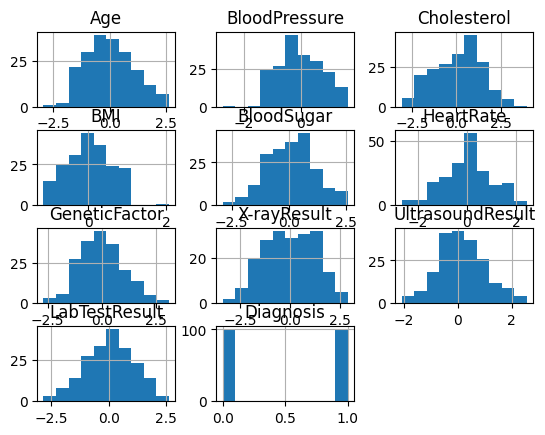

In [80]:
df.hist()

<AxesSubplot: >

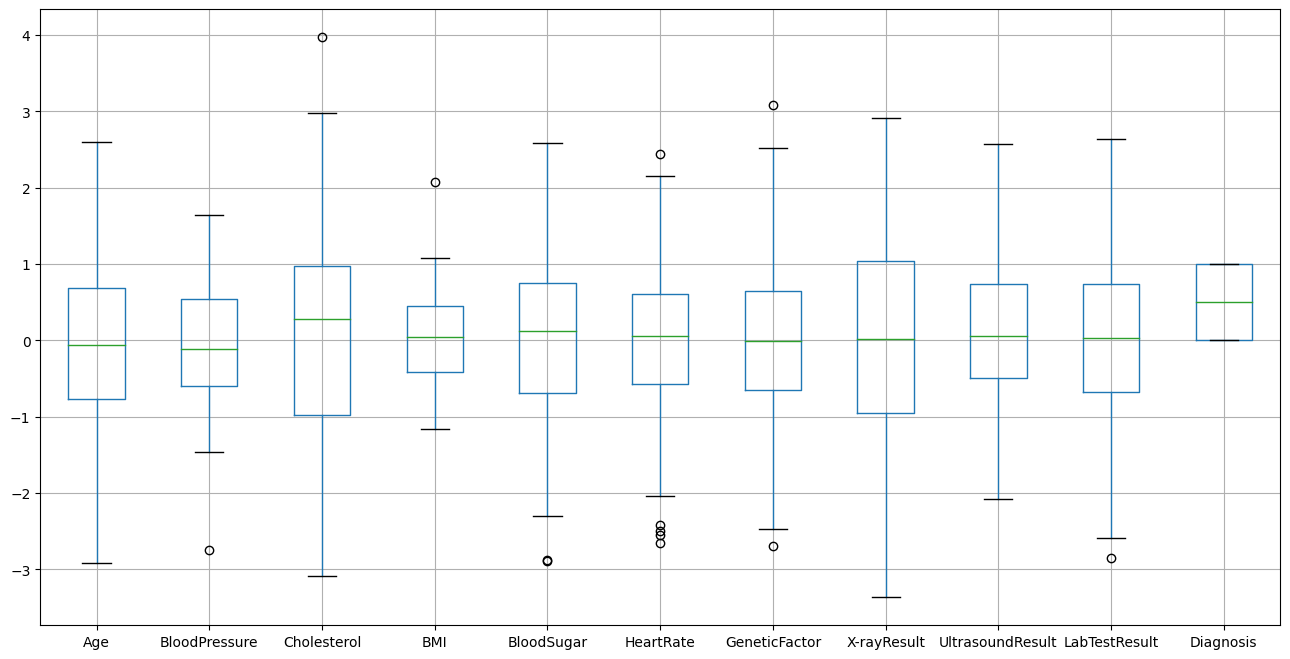

In [81]:
df.boxplot(figsize=(16,8))

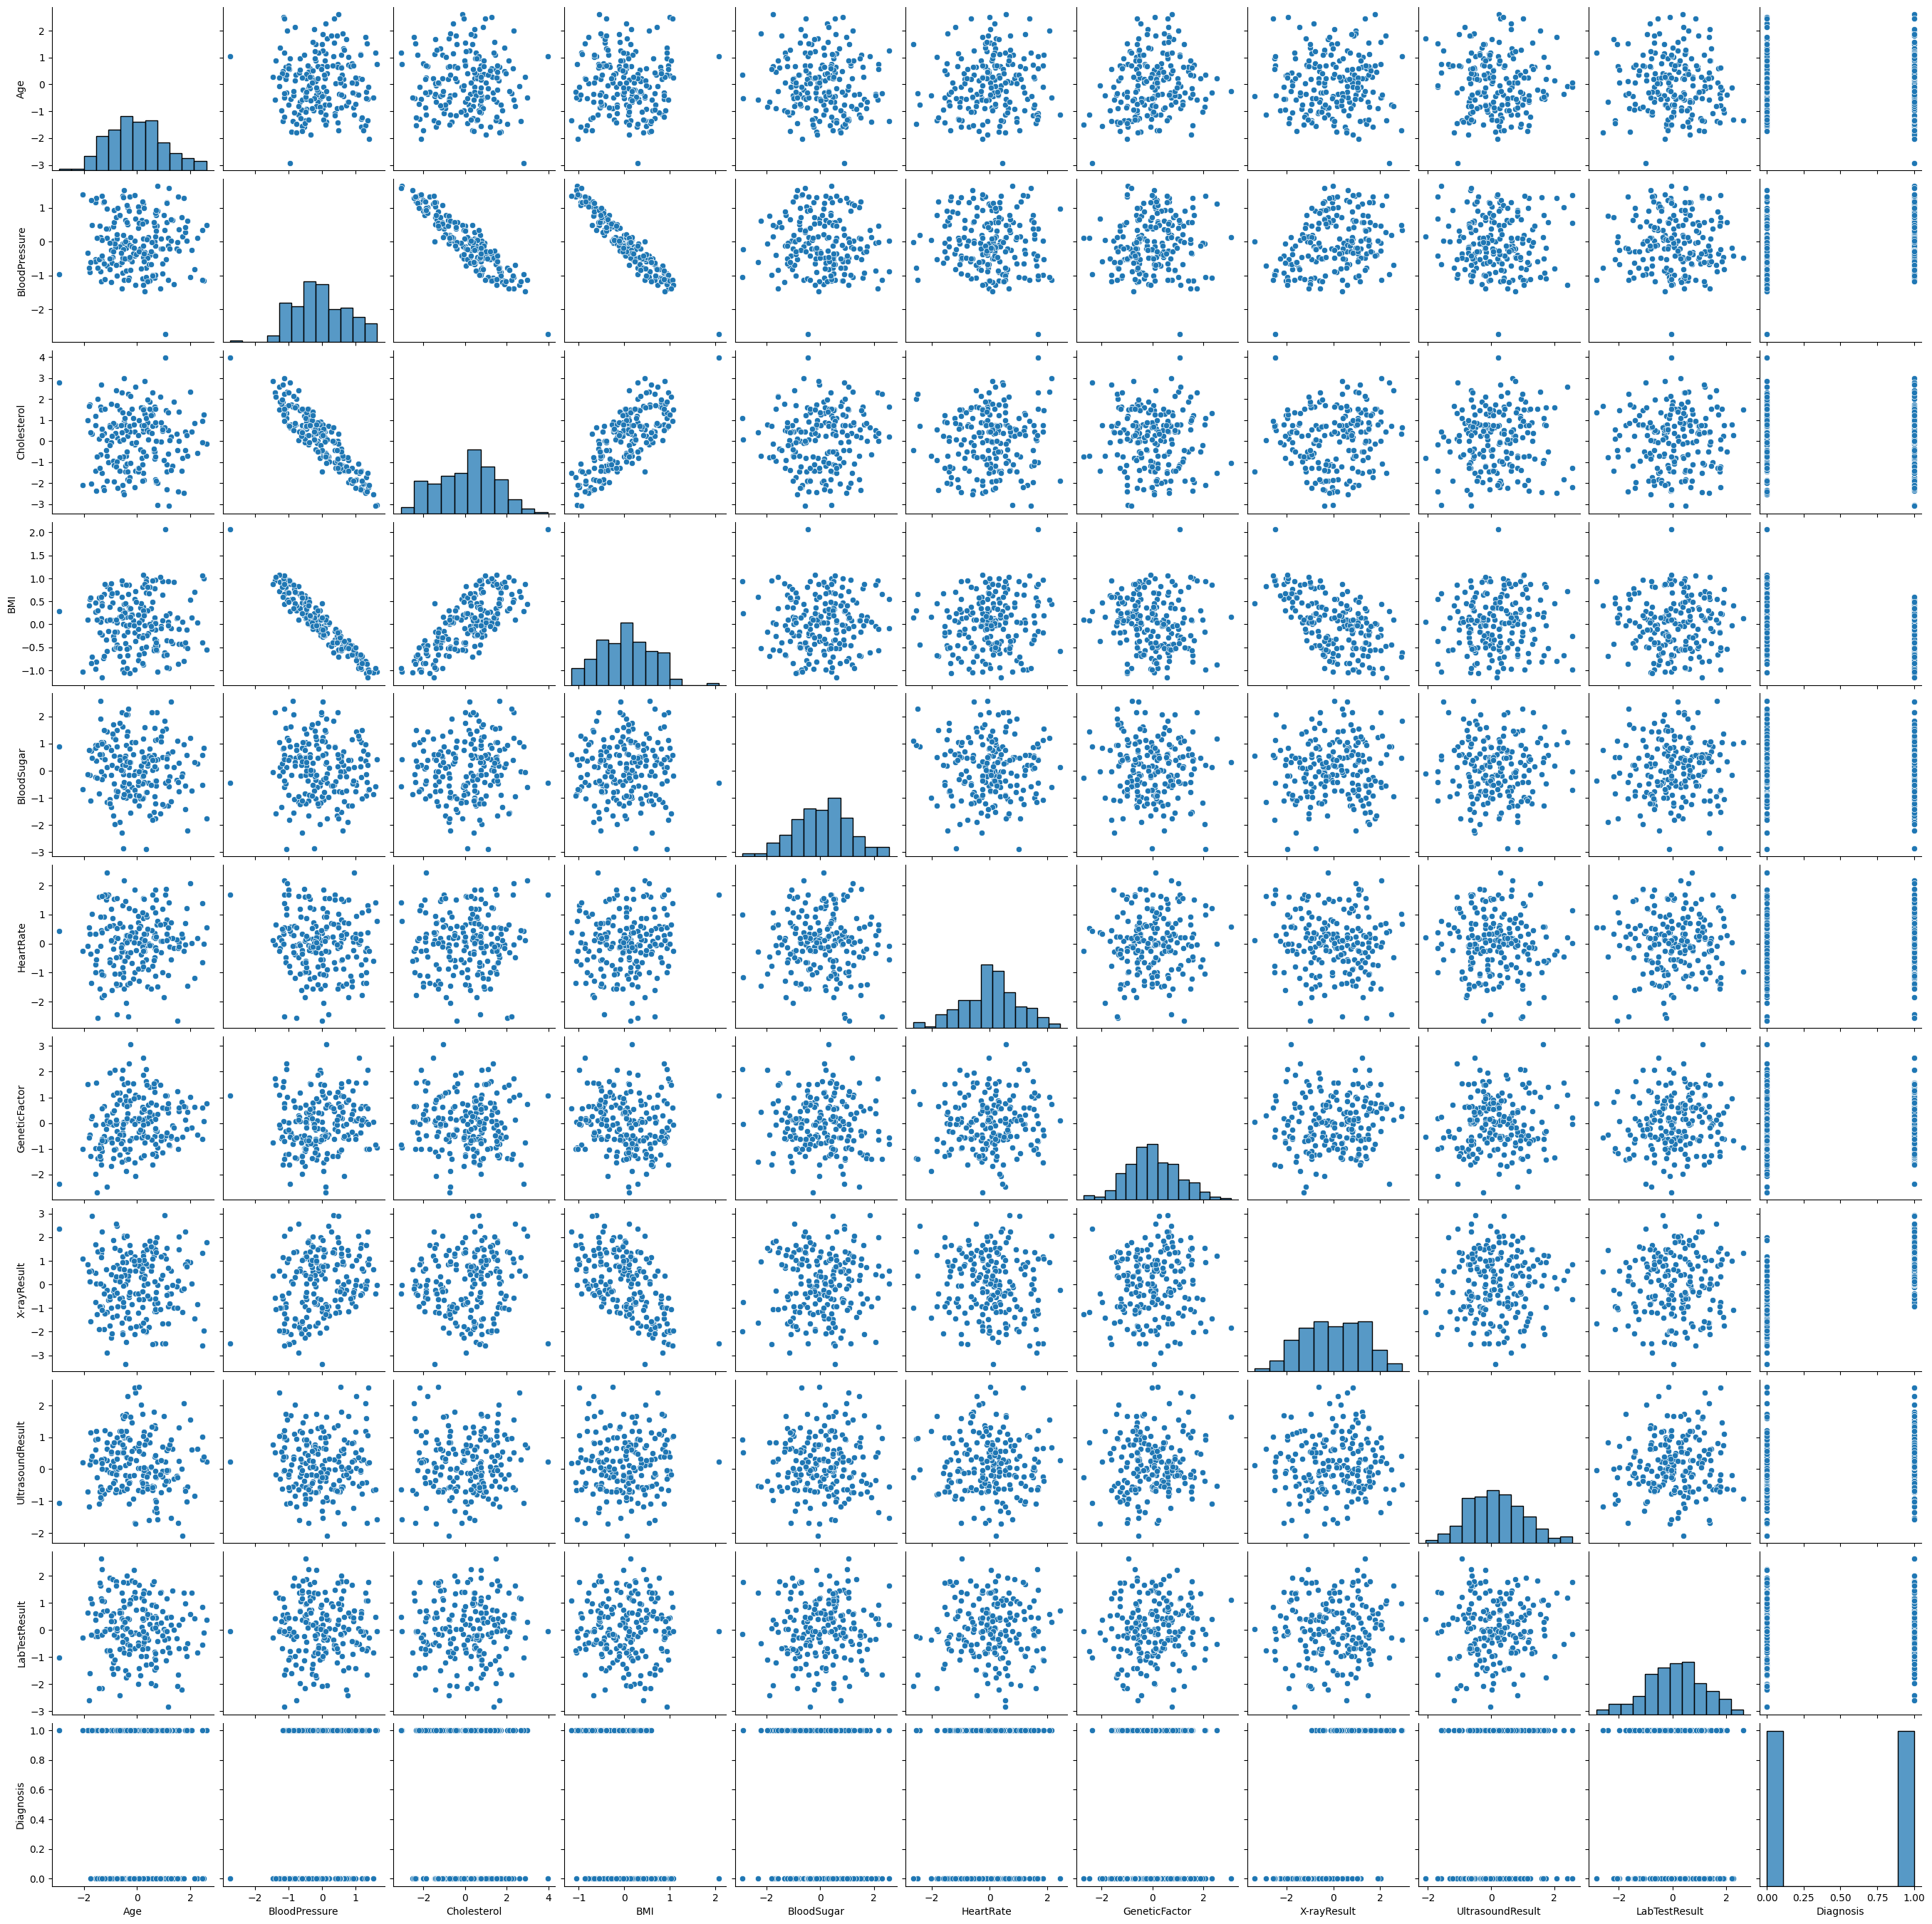

In [82]:
sns.pairplot(df)

In [83]:
# Describe features and labels
x = df.iloc[:,:-1]
y = df.iloc[:,-1:]

In [84]:
# Describe the distribution of diagnoses
y.value_counts()

Diagnosis
0            100
1            100
dtype: int64

# 2. Data Preprocessing:

a. Explain the necessary data preprocessing steps for preparing the medical data. This may include handling missing values, normalizing or scaling features, and encoding categorical variables.

b. Calculate the prior probabilities P(Condition) and P(No Condition) based on the class distribution.

In [85]:
# Necessary data preprocessing steps for preparing the medical data
df.isnull().sum()

Age                 0
BloodPressure       0
Cholesterol         0
BMI                 0
BloodSugar          0
HeartRate           0
GeneticFactor       0
X-rayResult         0
UltrasoundResult    0
LabTestResult       0
Diagnosis           0
dtype: int64

In [86]:
# Calculate the prior probabilities P(Condition) and P(No Condition)

condition_counts = df["Diagnosis"].value_counts()
prior_condition = condition_counts[1] / len(df)
prior_no_condition = condition_counts[0] / len(df)

print("Prior Probability of Condition:", prior_condition)
print("Prior Probability of No Condition:", prior_no_condition)

Prior Probability of Condition: 0.5
Prior Probability of No Condition: 0.5


# 3. Feature Engineering:

a. Describe how to convert the medical test results and patient information into suitable features for the Naive Bayes model.

b. Discuss the importance of feature selection or dimensionality reduction in medical diagnosis.

# Convert the medical test results and patient information into suitable features for the Naive Bayes model

All the features taken here are the continuous features.So, we can directly use them as they are. Therefore, using one-hot encoding for categorical variables is not required now. 

# Importance of feature selection or dimensionality reduction in medical diagnosis

- Reducing Overfitting
- Improving Model Interpretability
- Computational Efficiency
- Handling Redundancy

# 4. Implementing Naive Bayes:

a. Choose the appropriate Naive Bayes variant (eg., Gaussian, Multinomial, or Bernoulli Naive Bayes) for the medical diagnosis task and implement the classifier using Python libraries like scikit-learn.

b. Split the dataset into training and testing sets.

In [87]:
'''Choose the appropriate Naive Bayes variant (eg., Gaussian, Multinomial, or Bernoulli Naive Bayes)
for the medical diagnosis task and implement the classifier using Python libraries like scikit-learn'''

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
print('************Choosing the appropriate Naive Bayes variant i.e., GaussianNB model************\n')
nb_classifier = GaussianNB()

************Choosing the appropriate Naive Bayes variant i.e., GaussianNB model************



# 5. Model Training:

a. Train the Naive Bayes model using the feature-engineered dataset. Explain the probability estimation process in Naive Bayes for medical diagnosis.

In [88]:
print('Training the model........\n')
nb_classifier.fit(x_train, y_train.values.ravel())
print('Training is completed.....!\n')
print()
print('Testing the model.........\n')
y_pred = nb_classifier.predict(x_test)
print('Predicted label for the input samples:\n', y_pred)
print('\nTesting is completed....!\n')

Training the model........

Training is completed.....!


Testing the model.........

Predicted label for the input samples:
 [1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1
 0 1 1]

Testing is completed....!



#Explain the probability estimation process in Naive Bayes for medical diagnosis

The probability estimation process in Naive Bayes involves calculating the likelihood of observing the given features for each class, incorporating prior probabilities, and determining the class with the highest posterior probability. This approach is particularly effective for medical diagnosis when features can be treated as conditionally independent given the diagnosis.

# 6. Model Evaluation:

a. Assess the performance of the medical diagnosis model using relevant evaluation metrics, such as accuracy, precision, recall,    and F1-score.

b. Interpret the results and discuss the model's ability to accurately classify medical conditions.

In [89]:
# Evaluation of metrics, such as accuracy, precision, recall, and F1-score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [90]:
#  Interpret the results 

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.875
Precision: 0.88
Recall: 0.9166666666666666
F1 Score: 0.8979591836734694

Confusion Matrix:
[[13  3]
 [ 2 22]]


#Discuss the model's ability to accurately classify medical conditions

- The model demonstrates a good overall performance, with a high accuracy and balanced precision and recall.

- The confusion matrix shows that the model made a few false positive and false negative predictions, but these are relatively     low in comparison to the true positives and true negatives.

- The choice between precision and recall depends on the specific medical context. If missing a positive diagnosis is more         critical, then a higher recall might be prioritized.

# 7. Laplace Smoothing:

a. Explain the concept of Laplace (add-one) smoothing and discuss its potential application in the context of medical diagnosis.

b. Discuss the impact of Laplace smoothing on model performance.

# a. Concept of Laplace (add-one) smoothing and its potential application in the context of medical diagnosis

Laplace smoothing, also known as add-one smoothing, is a technique used to handle the issue of zero probabilities in probabilistic models, such as Naive Bayes. It involves adding a small constant to the count of each possible outcome for every feature in the dataset. This ensures that no probability becomes exactly zero, which can be problematic when calculating likelihoods.

In the context of medical diagnosis with Naive Bayes, Laplace smoothing is applied to address situations where certain combinations of medical test results and patient information may not be present in the training data. Without smoothing, the probability estimate for such combinations would be zero, leading to a breakdown in the calculation of posterior probabilities.

In medical diagnosis, Laplace smoothing becomes relevant when dealing with rare combinations of symptoms or patient characteristics that might be crucial indicators of a particular medical condition.

Medical datasets can be sparse, and certain combinations of features may not occur frequently. Laplace smoothing helps prevent the model from assigning zero probabilities to these rare combinations, allowing the model to generalize better to unseen instances.

# b. The impact of Laplace smoothing on model performance

Robustness: Laplace smoothing increases the robustness of the Naive Bayes model by avoiding zero probabilities.

Generalization: It allows the model to generalize better to unseen instances with combinations of features not present in the training data.

Influence on Small Datasets: In large datasets, Laplace smoothing may have minimal impact. However, in smaller datasets, the smoothing constant should be chosen carefully to avoid overcompensating for the lack of data.

Tuning: The choice of the smoothing constant is a hyperparameter that may need tuning. Cross-validation can help find an optimal value.

# 8. Real-World Application:

a. Describe the importance of accurate medical diagnosis in healthcare and research.

b. Discuss the practical implications of implementing a diagnostic system based on Naive Bayes.

# a. Importance of Accurate Medical Diagnosis

Accurate medical diagnosis is crucial for healthcare and research because it directly impacts patient outcomes. A correct diagnosis helps doctors identify the right treatment and care plan for a patient's health condition. It's like having a roadmap knowing what's wrong allows healthcare professionals to provide the most effective solutions. In research, accurate diagnoses contribute to understanding diseases, developing new treatments, and improving overall healthcare knowledge.

# b. Practical Implications of a Naive Bayes Diagnostic System

Imagine a smart assistant for doctors that uses a system called Naive Bayes. It helps by quickly analyzing medical test results and patient information to suggest possible diagnoses. The practical benefit is speed – Naive Bayes is fast, allowing doctors to make quicker decisions. However, it's based on the "naive" assumption that test results are independent, so it might not capture all complexities. While it's a useful tool, doctors still play the main role in interpreting results and making final decisions. It's like having a helpful assistant that speeds up the process, but the doctor's expertise is irreplaceable.

# 9. Model Limitations:

a. Identify potential limitations of the Naive Bayes approach to medical diagnosis and discuss scenarios in which it may not perform well.

1. Overly Simple Assumption:
Naive Bayes assumes that test results are independent, which might not be true in real life. It's like assuming each symptom doesn't affect the others, which may oversimplify the complexity of medical conditions.

2. Sensitivity to Input Quality:
It's sensitive to the quality of input data. If the data is incomplete or contains errors, Naive Bayes may not perform well. It's like a computer program – if you feed it wrong information, it might give inaccurate results.

3. Rare Events Handling:
Naive Bayes struggles with rare events or combinations of symptoms that are not well-represented in the data. It's like having a book with missing pages – if the symptoms are rare, it may not recognize them correctly.

4. Limited Understanding of Context:
It doesn't capture the context or relationships between symptoms. It's like looking at puzzle pieces without seeing the whole picture – Naive Bayes might miss the connections between symptoms that doctors consider when diagnosing.

5. Not Ideal for Continuous Data:
It assumes features are categorical and doesn't work well with continuous data. It's like trying to fit a square peg into a round hole – if the data doesn't fit the assumptions, Naive Bayes may not be the best choice.

# 10. Presentation and Recommendations:

a. Prepare a presentation or report summarizing your analysis, results, and recommendations for the medical research institute. Highlight the significance of accurate medical diagnosis and the role of Naive Bayes in healthcare.

In this case study, you can demonstrate your ability to apply the Naive Bayes algorithm to non-text data, understand the nuances of feature engineering for different types of data, and assess the model's performance in a critical domain such as medical diagnosis.

In simpler words, the presentation walks through the steps of using Naive Bayes for medical diagnosis, highlights its strengths, discusses its limitations, and suggests ways to maximize its effectiveness while emphasizing the critical role of doctors in the process.

# Customer Segmentation with K-Nearest Neighbors (KNN)

You work for a retail company, and your task is to segment customers based on their purchase behavior using the K-Nearest Neighbors (KNN) algorithm. The dataset contains information about customers, such as purchase history, age, and income. Your goal is to create customer segments for targeted marketing. Answer the following questions based on this case study.

# 1. Data Exploration:

a. Load the customer dataset using Python libraries like pandas and explore its structure. Describe the features, target variable, and data distribution.

b. Explain the importance of customer segmentation in the retail industry.

In [91]:
import pandas as pd
data = pd.read_csv('Customer.csv')
data.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [93]:
data.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

array([[<AxesSubplot: title={'center': 'BALANCE'}>,
        <AxesSubplot: title={'center': 'BALANCE_FREQUENCY'}>,
        <AxesSubplot: title={'center': 'PURCHASES'}>,
        <AxesSubplot: title={'center': 'ONEOFF_PURCHASES'}>],
       [<AxesSubplot: title={'center': 'INSTALLMENTS_PURCHASES'}>,
        <AxesSubplot: title={'center': 'CASH_ADVANCE'}>,
        <AxesSubplot: title={'center': 'PURCHASES_FREQUENCY'}>,
        <AxesSubplot: title={'center': 'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<AxesSubplot: title={'center': 'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <AxesSubplot: title={'center': 'CASH_ADVANCE_FREQUENCY'}>,
        <AxesSubplot: title={'center': 'CASH_ADVANCE_TRX'}>,
        <AxesSubplot: title={'center': 'PURCHASES_TRX'}>],
       [<AxesSubplot: title={'center': 'CREDIT_LIMIT'}>,
        <AxesSubplot: title={'center': 'PAYMENTS'}>,
        <AxesSubplot: title={'center': 'MINIMUM_PAYMENTS'}>,
        <AxesSubplot: title={'center': 'PRC_FULL_PAYMENT'}>],
       [<Axes

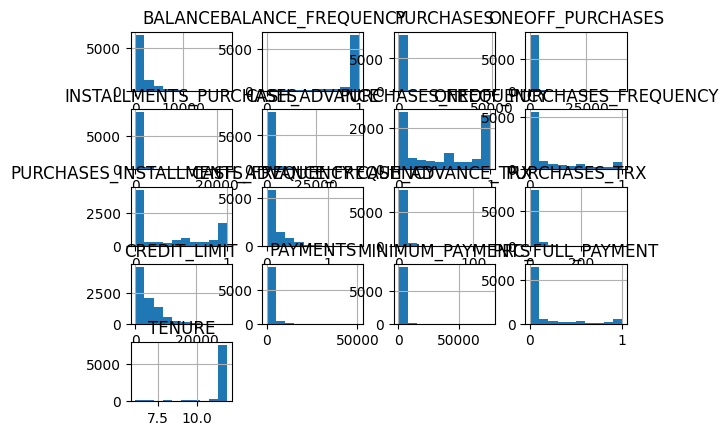

In [94]:
data.hist()

In [95]:
data.shape

(8950, 18)

<AxesSubplot: >

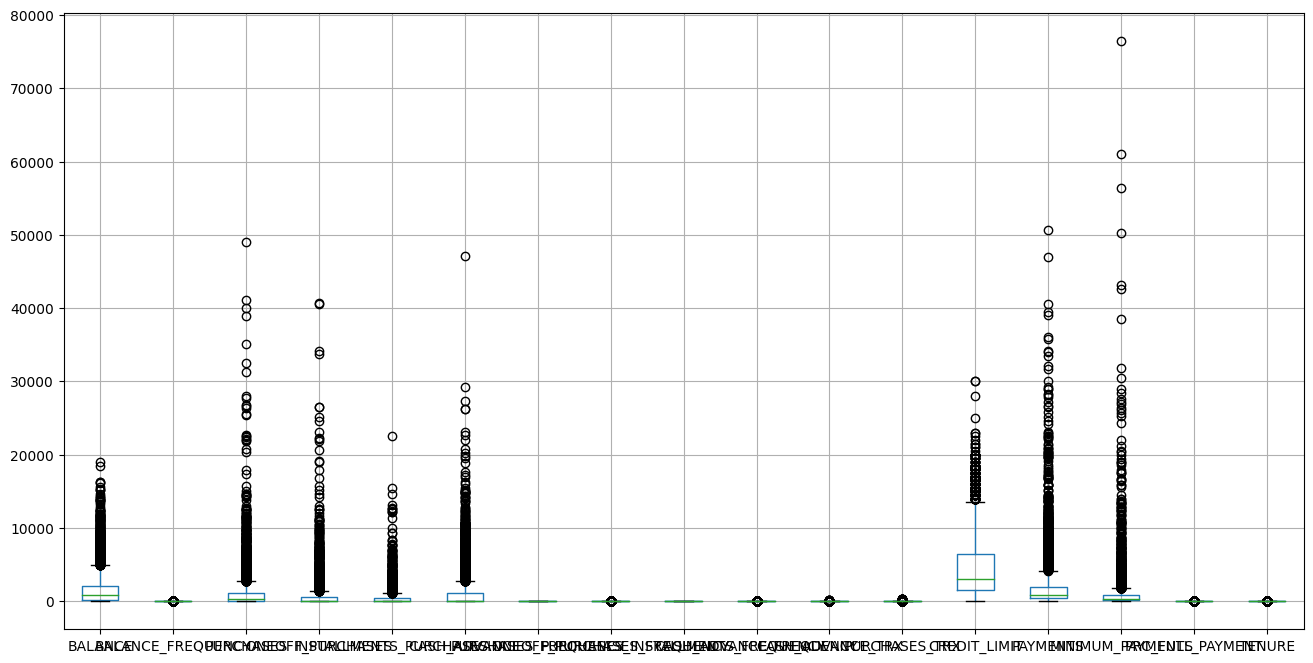

In [96]:
data.boxplot(figsize=(16,8))

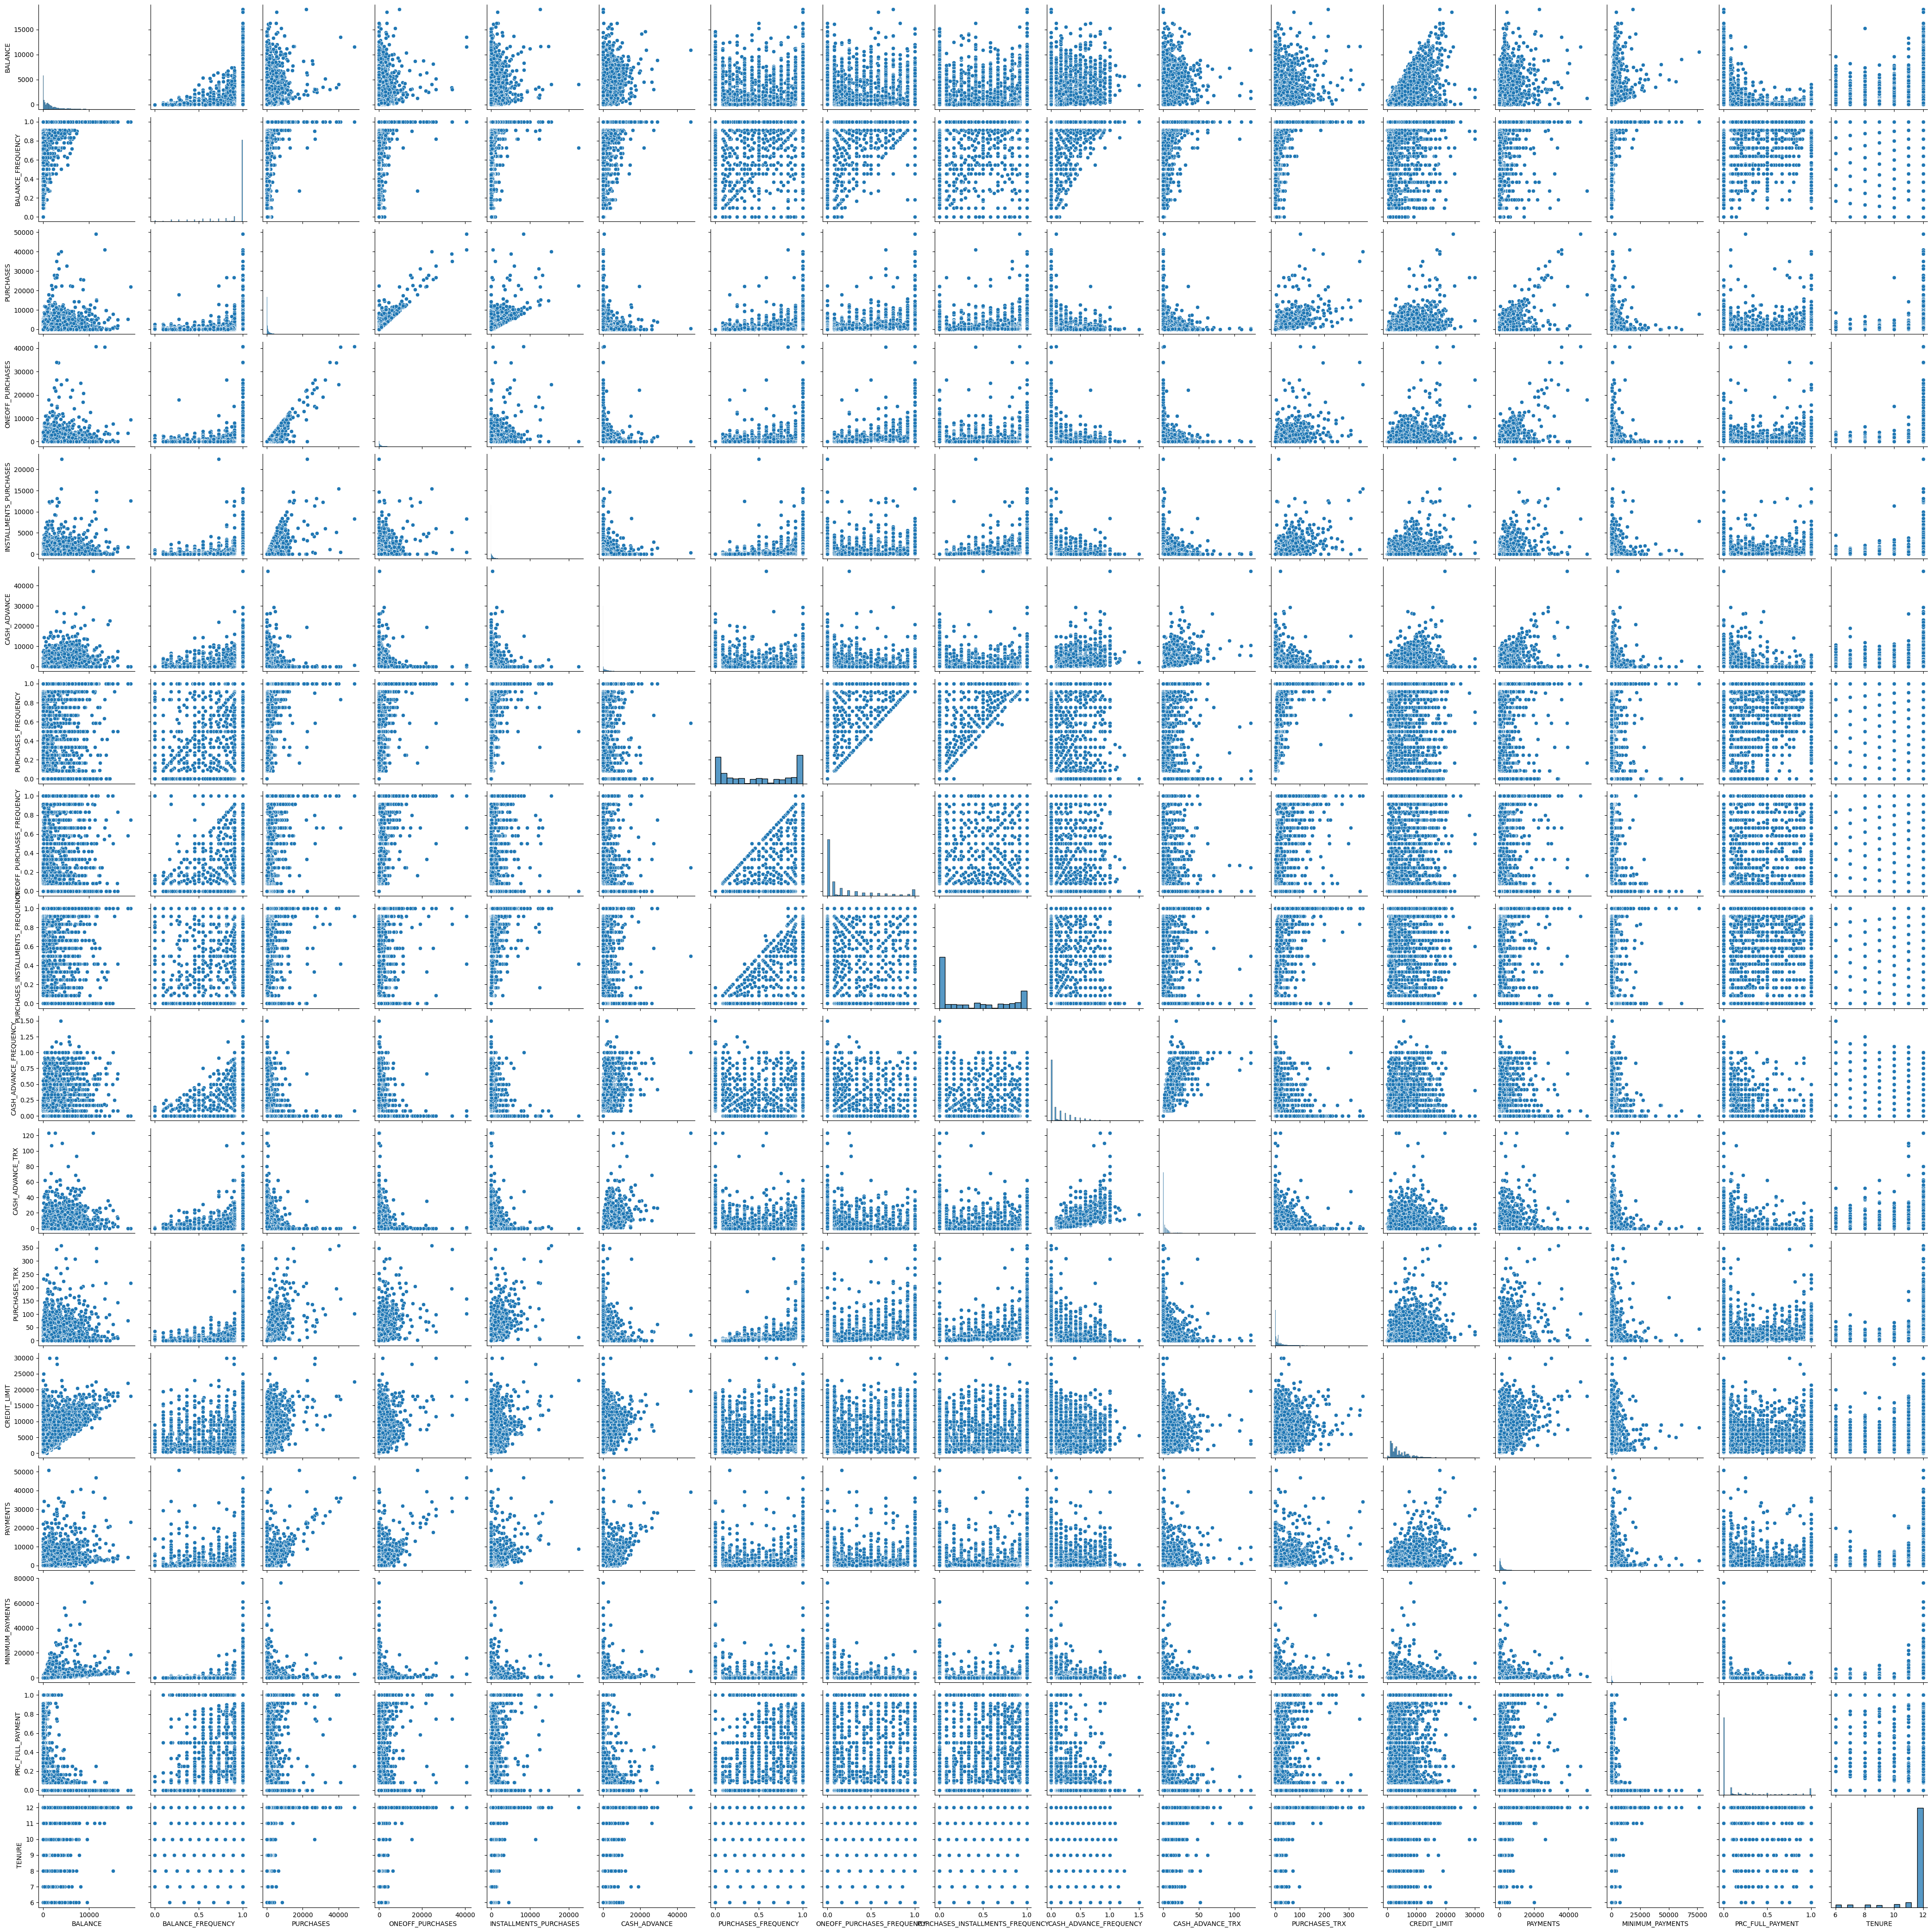

In [97]:
sns.pairplot(data)

#Importance of customer segmentation in the retail industry

Customer segmentation in retail is crucial for personalized marketing strategies. It helps in tailoring promotions, products, and communication to specific customer groups, leading to improved customer satisfaction and increased sales.

# 2. Data Preprocessing:

a. Prepare the customer data for analysis. Discuss the steps involved in data preprocessing, such as scaling, handling missing values, and encoding categorical variables.

In [137]:
# Handling missing values
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [138]:
d = data.fillna(method = 'bfill')
d.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [139]:
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(), inplace=True)
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean(), inplace=True)

In [140]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']] = scaler.fit_transform(data[['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']])

# 3. Implementing KNN:

a. Implement the K-Nearest Neighbors algorithm using Python libraries like scikit-learn to segment customers based on their features.

b. Choose an appropriate number of neighbors (K) for the algorithm and explain your choice.

In [144]:
# Implement the K-Nearest Neighbors algorithm using Python libraries

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

X = data.drop(['CUST_ID', 'BALANCE'], axis=1)
Y = data['BALANCE']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Handle missing values in X
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# Initialize KNN with an appropriate K (e.g., 5)
knn = KNeighborsRegressor(n_neighbors=5)
print('**********Implementing KNN**********')

**********Implementing KNN**********


- A smaller K (e.g., K=1) makes the model more sensitive to noise and outliers, potentially leading to overfitting.

- A larger K (e.g., K=20) may result in a smoother decision boundary but could lead to underfitting and ignore local patterns in   the data.

In practice, it's common to start with an odd value for K to avoid ties and experiment with different values. The optimal K often depends on the specific dataset, and you can use techniques like cross-validation to find the best value. In the code, n_neighbors=5 is a starting point, and you can adjust it based on the model's performance.

# 4. Model Training:

a. Train the KNN model using the preprocessed customer dataset.

b. Discuss the distance metric used for finding the nearest neighbors and its significance in customer segmentation.

In [145]:
# Ensure there are no missing values in X_train before training
X_train.dropna(inplace=True)

# Train the KNN model
print('Training the model........\n')
knn.fit(X_train, Y_train)
print('Training is completed.....!\n')
print()
print('Testing the model.........\n')
Y_pred = knn.predict(X_test)
print('Predicted label for the input samples:\n', Y_pred)
print('\nTesting is completed....!\n')

Training the model........

Training is completed.....!


Testing the model.........

Predicted label for the input samples:
 [1416.145664  3557.3218502  339.3711022 ... 1224.7951396   73.407579
 1641.0242674]

Testing is completed....!



# b. Discuss the distance metric used for finding the nearest neighbors and its significance

By default, the KNeighborsClassifier in scikit-learn uses the Euclidean distance metric. Euclidean distance measures the straight-line distance between two points in space. It is commonly used but might not be suitable for all types of data, especially if features have different scales.

The choice of distance metric is essential in customer segmentation because it affects how the algorithm measures similarity between data points.

# 5. Customer Segmentation:

a. Segment the customers based on their purchase behavior, age, and income.

b. Visualize the customer segments to gain insights into the distribution and characteristics of each segment.

In [150]:
# Segment the customers 
from sklearn.cluster import KMeans

segmentation_data = data[['PURCHASES', 'TENURE', 'PRC_FULL_PAYMENT']]

kmeans = KMeans(n_clusters=3, random_state=42) 
data['Segment'] = kmeans.fit_predict(segmentation_data)

C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


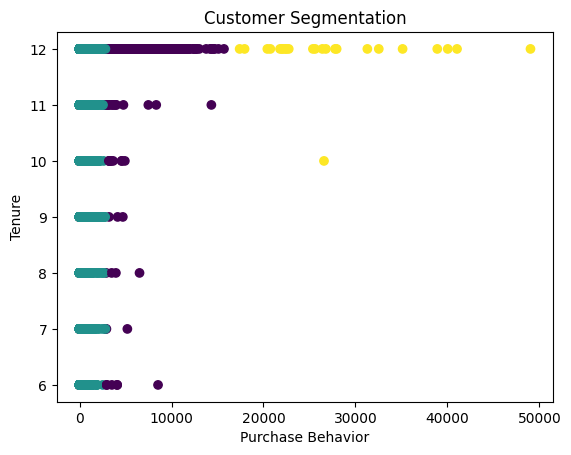

In [151]:
# Visualizing the customer segments
plt.scatter(data['PURCHASES'], data['TENURE'], c=data['Segment'], cmap='viridis')
plt.xlabel('Purchase Behavior')
plt.ylabel('Tenure')
plt.title('Customer Segmentation')
plt.show()

# 6. Hyperparameter Tuning:

a. Explain the role of the hyperparameter (K) in the KNN algorithm and suggest strategies for selecting the optimal value of K.

b. Conduct hyperparameter tuning for the KNN model and discuss the impact of different values of K on segmentation results.

# a. The role of the hyperparameter (K) in the KNN algorithm and some strategies

The hyperparameter 'K' in K-Nearest Neighbors (KNN) is the number of nearby neighbors considered for predictions. Picking the right 'K' is crucial. Small 'K' (like 1) can lead to overfitting, being too sensitive to details. Large 'K' (e.g., 20) might oversimplify, missing local patterns.

Strategies for 'K' Selection:

Cross-Validation: Check different 'K' values using cross-validation for solid generalization.
Odd Values: Prefer odd 'K' to prevent ties in binary classification problems.
Grid Search: Systematically try various 'K' values and evaluate their performance.
Domain Knowledge: Leverage your expertise for a 'K' that aligns with the problem's nature.

In [154]:
# Conduct hyperparameter tuning for the KNN model

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)

# Get the best parameter
best_k = grid_search.best_params_['n_neighbors']
print("Best parameters: ", best_k)

Best parameters:  15


This code uses GridSearchCV to perform hyperparameter tuning for the 'n_neighbors' hyperparameter. It searches over a specified range of 'K' values and uses cross-validation to find the best 'K' based on the mean squared error. Adjust the parameter grid and scoring metric based on your specific problem.

After obtaining the best 'K,' you can analyze the impact of different 'K' values on segmentation results, considering both accuracy and model generalization. 

# 7. Model Evaluation:

a. Evaluate the KNN model's performance in customer segmentation. Discuss the criteria and metrics used for evaluating unsupervised learning models.

b. Interpret the results and provide insights on how the customer segments can be leveraged for marketing strategies.

In [156]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Evaluate the model
silhouette = silhouette_score(segmentation_data, data['Segment'])
davies_bouldin = davies_bouldin_score(segmentation_data, data['Segment'])
inertia = kmeans.inertia_

In [158]:
# Interpret the results
print(f"Silhouette Score: {silhouette}")
print(f"Davies-Bouldin Index: {davies_bouldin}")
print(f"Inertia (WCSS): {inertia}")

Silhouette Score: 0.7984251198324376
Davies-Bouldin Index: 0.457141278888417
Inertia (WCSS): 9553436027.951607


The high silhouette score and low Davies-Bouldin Index indicate strong clustering, providing valuable insights for targeted and personalized marketing strategies. However, considering the relatively high inertia, further analysis or adjustments to the clustering approach may be explored to achieve tighter clusters.

# 8. Real-World Application:

a. Describe the practical applications of customer segmentation in the retail industry.

b. Discuss how customer segmentation can lead to improved customer engagement and increased sales.

# a. Practical applications of customer segmentation

- Targeted Marketing Campaigns
- Inventory Management
- Personalized Shopping Experience
- Pricing Strategies
- Customer Loyalty Programs
- Product Development

# b. How customer segmentation can lead to improved customer engagement and increased sales

Enhanced Relevance:
Customer segmentation allows retailers to communicate messages that are relevant to specific groups. This increases the chances of customers engaging with marketing materials as they find them more personally meaningful.

Higher Conversion Rates:
Targeted marketing and personalized experiences lead to higher conversion rates. Customers are more likely to make purchases when they feel a connection to the products or promotions presented to them.

Customer Satisfaction:
Understanding customer preferences enables retailers to provide a more satisfying shopping experience. Satisfied customers are more likely to become repeat buyers and advocates for the brand.

Increased Customer Retention:
By addressing the unique needs of different segments, retailers can implement strategies to improve customer retention. Loyalty programs and personalized offers contribute to keeping customers engaged and committed to the brand.

Maximized Marketing ROI:
Targeting the right audience reduces marketing spend on broad campaigns that may not resonate with all customers. This leads to a more efficient allocation of resources and a higher return on investment (ROI).

Competitive Advantage:
Retailers that effectively use customer segmentation gain a competitive advantage. They can stay agile in responding to market changes and quickly adapt strategies to meet the evolving needs of different customer groups.

# 9. Model Limitations:

a. Identify potential limitations of the KNN algorithm in customer segmentation and discuss scenarios in which it may not perform well.

1. Sensitive to Weird Data: If there are strange data points (outliers), KNN can get confused.

2. Can Take a While for Big Data: As the data gets bigger, KNN needs more time to make predictions. It's like asking too many                                     friends for advice.

3. Doesn't Like Useless Info: If some info doesn't matter, KNN might not do well. It's like listening to everyone's opinion,                                   even if it doesn't help.

4. Needs the Right Number of Friends: Picking the right number of friends (neighbors) is tricky. Too few or too many can cause                                         problems. It's like choosing the right number of buddies for advice.

5. Likes All Features the Same: KNN treats all info equally. If some info is not important, KNN might make mistakes. It's like                                   considering all advice equally, even if some friends aren't good at giving advice.

6. Too Many Features Can Be Confusing: If there's too much info, KNN might struggle. It's like having too many options and                                              getting overwhelmed.

7. Not Fair to Small Groups: If some groups are smaller, KNN might not notice them. It's like not hearing the ideas of a few                                  friends in a big crowd.

8. Hard to Explain: KNN doesn't explain why it makes decisions. It's like getting advice without knowing why it was given.

9. Likes Simple Shapes: KNN prefers simple shapes to make decisions. If the shapes are too complicated, KNN might make mistakes.

10. Doesn't Like Mostly Empty Info: If there's not much useful info, KNN might not work well. It's like having a lot of blank                                       spaces in your advice.

# 10. Presentation and Recommendations:

a. Prepare a presentation or report summarizing your analysis, results, and recommendations for the retail company. Highlight the significance of customer segmentation and the role of KNN in data-driven marketing.

In this case study, you are required to demonstrate your ability to use the KNN algorithm for customer segmentation, understand the importance of hyperparameter tuning, and communicate the practical applications of customer segmentation in the retail sector.

In simpler words, it highlights the power of KNN in customer segmentation, providing actionable insights for retailers to enhance their marketing strategies and improve customer engagement.